## Spotify Billboard Hot 100

In [ ]:
pip install spotipy


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: /Users/nandhinishankar/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import json
import time

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

### Use the Billboard Hot 100's Playlist's URI

In [ ]:
client_id = '456b176f8e9246a0825ac0c4d9ec1f43'
secret = '2ee5e41324c241299208a8b844ae6c7c'
# playlist uri
# from the 4th of February
billboard_uri = 'spotify:playlist:6OML3vQZzyfYfeykXAiOGu'

In [ ]:
# using the 'client_id' and 'secret' variables for spotify client credentials
# authenticating session
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=secret)

# create spotify session object
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Data Scraping

In [ ]:
billboard_tracks = sp.playlist(billboard_uri)

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


In [ ]:
# getting the first song from the Billboard Hot 100's list
# prints out the details of the first song
billboard_tracks['tracks']['items'][0]['track']

{'album': {'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5YGY8feqx7naU7z4HrwZM6'},
    'href': 'https://api.spotify.com/v1/artists/5YGY8feqx7naU7z4HrwZM6',
    'id': '5YGY8feqx7naU7z4HrwZM6',
    'name': 'Miley Cyrus',
    'type': 'artist',
    'uri': 'spotify:artist:5YGY8feqx7naU7z4HrwZM6'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',
   'HT',

Information we need
1. Name (of the artist)
2. Name of the song
3. Id
4. Popularity

In [ ]:
# retrieving the name of the artist
billboard_tracks['tracks']['items'][1]['track']['artists'][0]['name']

'SZA'

In [ ]:
# retrieving the name of the song
billboard_tracks['tracks']['items'][1]['track']['name']

'Kill Bill'

In [ ]:
# retrieving the uri of the song
billboard_tracks['tracks']['items'][1]['track']['uri']

'spotify:track:3OHfY25tqY28d16oZczHc8'

In [ ]:
# retrieving popularity of the song
billboard_tracks['tracks']['items'][1]['track']['popularity']

92

In [ ]:
# creating lists for

# Name of the artist
artist_name = []

# Name of the song
song_name = []

# Id/uri of the song
song_id = []

# Popularity of the song
song_popularity = []


### Retrieve songs and song details from the Billboard Playlist

In [ ]:
# appending song details to each list
for i,j in enumerate(billboard_tracks['tracks']['items']):
    artist_name.append(j['track']['artists'][0]['name'])
    song_name.append(j['track']['name'])
    song_id.append(j['track']['uri'])
    song_popularity.append(j['track']['popularity'])

In [ ]:
# adding lists to a data frame 
import pandas as pd

billboard_df = pd.DataFrame({"Artist":artist_name, "Song Title": song_name, "Song ID": song_id, 
                             "Song Popularity": song_popularity})

In [ ]:
billboard_df.head()

,Artist,Song Title,Song ID,Song Popularity
0,Miley Cyrus,Flowers,spotify:track:0yLdNVWF3Srea0uzk55zFn,100
1,SZA,Kill Bill,spotify:track:3OHfY25tqY28d16oZczHc8,92
2,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),spotify:track:2dHHgzDwk4BJdRwy9uXhTO,94
3,PinkPantheress,Boy's a liar Pt. 2,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,93
4,Morgan Wallen,Last Night,spotify:track:59uQI0PADDKeE6UZDTJEe8,87


In [ ]:
# we can extract the audio features of the first track
# using audio_features
# the first track on this list is Flowers by Miley Cyrus
sp.audio_features(billboard_df['Song ID'][0])

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


[{'danceability': 0.707,
  'energy': 0.681,
  'key': 0,
  'loudness': -4.325,
  'mode': 1,
  'speechiness': 0.0668,
  'acousticness': 0.0632,
  'instrumentalness': 5.15e-06,
  'liveness': 0.0322,
  'valence': 0.646,
  'tempo': 117.999,
  'type': 'audio_features',
  'id': '0yLdNVWF3Srea0uzk55zFn',
  'uri': 'spotify:track:0yLdNVWF3Srea0uzk55zFn',
  'track_href': 'https://api.spotify.com/v1/tracks/0yLdNVWF3Srea0uzk55zFn',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0yLdNVWF3Srea0uzk55zFn',
  'duration_ms': 200455,
  'time_signature': 4}]

Important Features of a track that I want to use for this analysis:

1. Danceability: How suitable is this track for dancing? Would you play it at max volumne at the club?

2. Energy: Measured on a scale of 0.0 - 1.0. Energetic tracks feel fast, loud, and noisy. 

3. Key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. >= -1 <= 11

3. Loudness: The overall loudness of a track in decibels (dB).Values typically range between -60 and 0 db.

4. Speechiness: Detects the presence of spoken words. For example, if it's a podcast recording, there are more spoken words and the value would be closer to 1.0. If it's between 0.33 - 0.66, the tracks contain both music and speech. This tends to be the case for rap music. If it's less than 0.33, the tracks tend to have more music and less speech.

5. Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.

6. Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. 

7. Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

8. Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

9. Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

10. Duration_ms: Duration in milliseconds. 

11. time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". >= 3<= 7

### Scraping audio features for all songs

In [ ]:
# creating lists for the different audio features we need
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness =[]
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
duration = []
timesignature = []

In [ ]:
audio_features = {
   'danceability': [],
   'energy': [],
    'key': [],
   'loudness': [],
    'mode': [],
    'speechiness': [],
   'acousticness': [],
   'instrumentalness': [],
    'liveness': [],
   'valence': [],
   'tempo': [],
    'duration': [],
    'time signature': []
}


In [ ]:
entries = []
# looping through tracks to extract the audio features for every song
    
for i,j in enumerate(billboard_df['Song ID']):
    entries.append(sp.audio_features([j]))

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at:

In [ ]:
# appending audio features to each list
for i,j in enumerate(entries):
    audio_features['danceability'].append(j[0]['danceability'])
    audio_features['energy'].append(j[0]['energy'])
    audio_features['key'].append(j[0]['key'])
    audio_features['loudness'].append(j[0]['loudness'])
    audio_features['mode'].append(j[0]['mode'])
    audio_features['speechiness'].append(j[0]['speechiness'])
    audio_features['acousticness'].append(j[0]['acousticness'])
    audio_features['instrumentalness'].append(j[0]['instrumentalness'])
    audio_features['liveness'].append(j[0]['liveness'])
    audio_features['valence'].append(j[0]['valence'])
    audio_features['tempo'].append(j[0]['tempo'])
    audio_features['duration'].append(j[0]['duration_ms'])
    audio_features['time signature'].append(j[0]['time_signature'])

In [ ]:
billboard_features = pd.DataFrame(audio_features)

In [ ]:
# Adding them to the billboard data frame
billboard_df['danceability'] = audio_features['danceability']
billboard_df['energy'] = audio_features['energy']
billboard_df['key'] = audio_features['key']
billboard_df['loudness'] = audio_features['loudness']
billboard_df['mode'] = audio_features['mode']
billboard_df['speechiness'] = audio_features['speechiness']
billboard_df['acousticness'] = audio_features['acousticness']
billboard_df['instrumentalness'] = audio_features['instrumentalness']
billboard_df['liveness'] = audio_features['liveness']
billboard_df['valence'] = audio_features['valence']
billboard_df['tempo'] = audio_features['tempo']
billboard_df['duration'] = audio_features['duration']
billboard_df['time signature'] = audio_features['time signature']

In [ ]:
# Now we have all the data we need for the tracks from the Billboard Hot 100 Playlist 
billboard_df

,Artist,Song Title,Song ID,Song Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time signature
0,Miley Cyrus,Flowers,spotify:track:0yLdNVWF3Srea0uzk55zFn,100,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455,4
1,SZA,Kill Bill,spotify:track:3OHfY25tqY28d16oZczHc8,92,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,0.1610,0.430,88.993,153947,4
2,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),spotify:track:2dHHgzDwk4BJdRwy9uXhTO,94,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520,4
3,PinkPantheress,Boy's a liar Pt. 2,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,93,0.696,0.809,5,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.857,132.962,131013,4
4,Morgan Wallen,Last Night,spotify:track:59uQI0PADDKeE6UZDTJEe8,87,0.517,0.675,6,-5.382,1,0.0357,0.4590,0.000000,0.1510,0.518,203.853,163855,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NLE Choppa,Slut Me Out,spotify:track:5BmB3OaQyYXCqRyN8iR2Yi,77,0.938,0.606,6,-6.396,0,0.4190,0.1170,0.000000,0.5280,0.706,121.108,123673,4
96,Arcángel,La Jumpa,spotify:track:5MxFWjuqQIsbNWbMdMdbli,87,0.713,0.703,8,-5.769,1,0.1940,0.2980,0.000000,0.3210,0.576,123.060,255693,4
97,Hotel Ugly,Shut up My Moms Calling,spotify:track:3hxIUxnT27p5WcmjGUXNwx,84,0.485,0.409,9,-10.711,0,0.1010,0.3250,0.000000,0.1030,0.376,138.419,164571,4
98,Dierks Bentley,Gold,spotify:track:4iy69rTUn8cAY8Q8q9vfOw,69,0.674,0.873,1,-4.256,1,0.0285,0.0482,0.000000,0.1800,0.946,115.010,167760,4


In [ ]:
# checking for null values
billboard_na = billboard_df.isna().sum()
# thankfully, there are no null values
# I am extremely pleased
print(billboard_na)

Artist              0
Song Title          0
Song ID             0
Song Popularity     0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration            0
time signature      0
dtype: int64


## Exploratory Data Analysis

I want to see which artists are popular from the Billboard Hot 100 List. I would also like to create visualizations for the audio features of billboard hot 100's songs to get an idea of what the overall distribution looks like.

### Top 10 streamed artists from the Billboard Hot 100

Text(0.5, 1.0, 'Top 10 Streamed Artists - Billboard Hot 100')

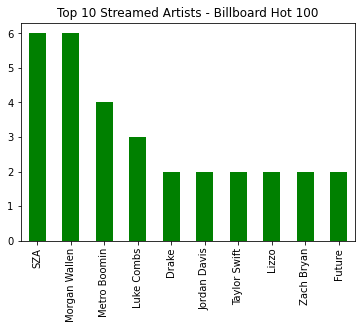

In [ ]:
billboard_df['Artist'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Streamed Artists - Billboard Hot 100')

SZA and tops the list with 6 songs on the billboard hot 100, very impressive! Followed by Morgan Wallen with the same number of songs.  

### Overall Distribution of audio features 

/Users/nandhinishankar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nandhinishankar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nandhinishankar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

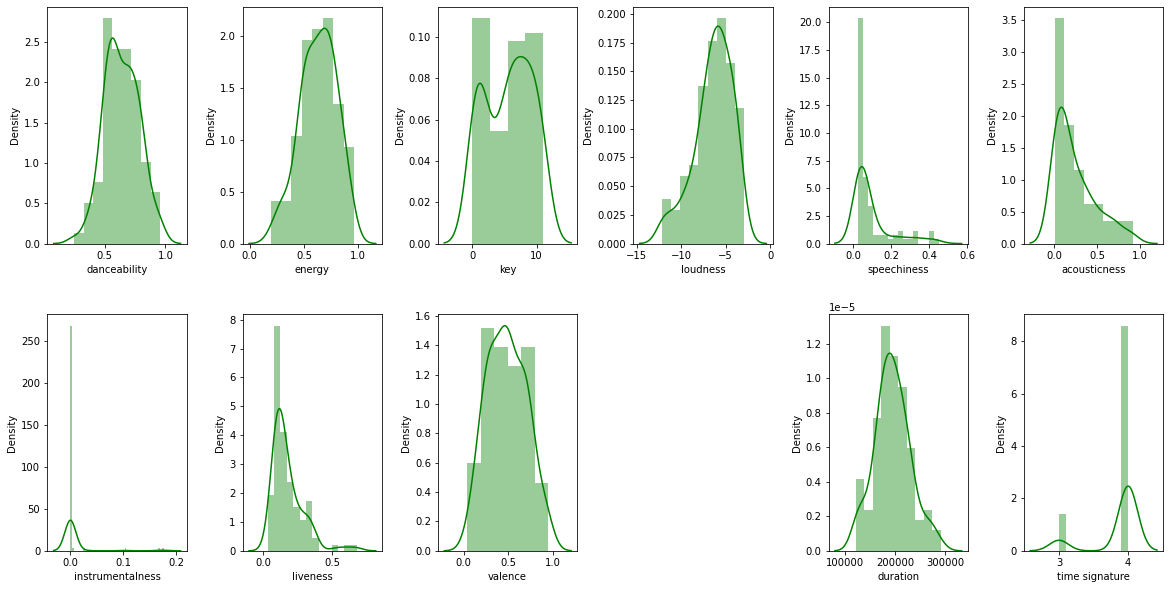

In [ ]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Features distribution
f, axes = plt.subplots(2, 6, figsize=(20, 10))

# Adjust the subplot layout parameters
f.subplots_adjust(hspace=0.3, wspace=0.4)

sns.distplot( billboard_df['danceability'], color="green", ax=axes[0, 0])
sns.distplot( billboard_df['energy'], color="green", ax=axes[0, 1])
sns.distplot( billboard_df['key'], color="green", ax=axes[0, 2])
sns.distplot( billboard_df['loudness'], color="green", ax=axes[0, 3])
sns.distplot( billboard_df['speechiness'], color="green", ax=axes[0, 4])
sns.distplot( billboard_df['acousticness'], color="green", ax=axes[0, 5])
sns.distplot( billboard_df['instrumentalness'], color="green", ax=axes[1, 0])
sns.distplot( billboard_df['liveness'], color="green", ax=axes[1, 1])
sns.distplot( billboard_df['valence'], color="green", ax=axes[1, 2])
sns.distplot( billboard_df['tempo'], color="green", ax=axes[1, 3])
sns.distplot( billboard_df['duration'], color="green", ax=axes[1, 4])
sns.distplot( billboard_df['time signature'], color="green", ax=axes[1, 5])

f.delaxes(axes[1][3])
plt.show()

We can see the distribution of the scores of audio features from the plots that were generated. Features like danceability, energy, tempo, valence, and duration seem to follow normal distributions. 

These audio features are relevant when it comes to mainstream pop music. 

There seems to be a slight negative skew for the loudness graph.  

From the liveness graph, we can see that the range of values is 0 - 0.75
Liveness detects the presence of an audience, if it's above 0.8, there is a high possiblity that it was a live performance. Songs that chart on the billboard list tend to be studio recorded versions. So this is expected. 

From the duration graph, we can see that the mean duration is around 200,000 ms which is 3.3 minutes. 
Radio stations want songs to be short so they can play more advertisements. Most artists are encouraged to release tracks that are between 3 minutes and 3 minutes 30 seconds. 

We can see that most values for speechiness fall between 0 and 0.2, if the value is less than 0.3, this means a song has more music and less words. This isn't surprising, most songs on the Billboard Hot 100 list tend to be more music based. 

We can also see that most songs have a time signature of 4.

### Correlation Analysis 

This can help us determine if there is a strong correlation between different audio features. Are these variables strongly correlated? Let's examine the relationships visually. 

In [ ]:
billboard_df.corr()

,Song Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time signature
Song Popularity,1.000000,0.094587,-0.042630,0.118154,-0.075572,-0.126709,-0.012346,0.002147,-0.251602,-0.046249,0.110142,0.168189,-0.015823,0.137885
danceability,0.094587,1.000000,0.262169,0.029301,0.172135,-0.242290,0.272745,-0.317374,-0.034127,-0.042827,0.433881,-0.132168,-0.271103,0.292509
energy,-0.042630,0.262169,1.000000,-0.002135,0.758051,0.105566,-0.029890,-0.553100,0.070456,0.195744,0.470219,-0.001070,0.031674,0.261228
key,0.118154,0.029301,-0.002135,1.000000,-0.066843,-0.100958,-0.184268,-0.073301,0.011360,0.112949,0.045025,0.033708,-0.197710,-0.093904
loudness,-0.075572,0.172135,0.758051,-0.066843,1.000000,0.176343,-0.065310,-0.351739,0.036818,0.042302,0.338226,0.033838,0.095026,0.257276
mode,-0.126709,-0.242290,0.105566,-0.100958,0.176343,1.000000,-0.227708,-0.001536,-0.111900,0.022936,0.052996,0.028166,0.052689,0.126886
speechiness,-0.012346,0.272745,-0.029890,-0.184268,-0.065310,-0.227708,1.000000,-0.116297,-0.101525,0.090106,0.046031,0.020845,-0.158128,0.056477
acousticness,0.002147,-0.317374,-0.553100,-0.073301,-0.351739,-0.001536,-0.116297,1.000000,0.025490,-0.089795,-0.204082,0.060466,-0.016040,-0.237518
instrumentalness,-0.251602,-0.034127,0.070456,0.011360,0.036818,-0.111900,-0.101525,0.025490,1.000000,0.017358,-0.146982,-0.158291,-0.091094,-0.120987
liveness,-0.046249,-0.042827,0.195744,0.112949,0.042302,0.022936,0.090106,-0.089795,0.017358,1.000000,0.111100,0.009637,-0.172730,-0.022646


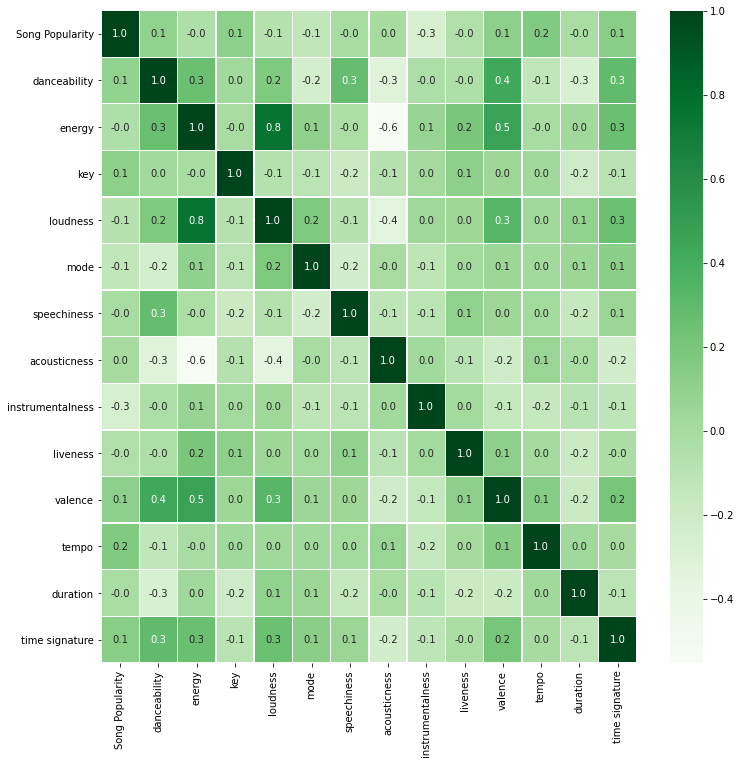

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(billboard_df.corr(),annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Greens")
plt.show() 

We can see that energy and loudness have a very high correlation score of 0.8. 
This makes sense because energetic songs tend to be loud too. 

We can also a see a somewhat high correlation between energy and valence (0.5). Songs with high valence scores tend to be positive, positive songs tend to be upbeat, so that explains it. 

### Frequency of songs based on emotion

In [ ]:
 def song_emotion(row):
        if row["valence"] > 0.5:
            return "happy"
        else:
            return "sad"

billboard_df["emotion"] = billboard_df.apply(song_emotion, axis=1)

Text(0.5, 1.0, 'Frequency of songs based on emotion')

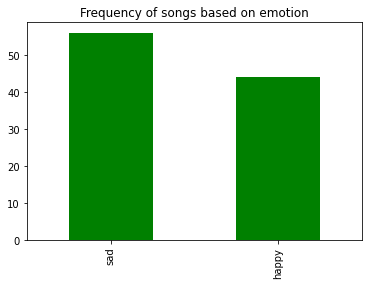

In [ ]:
billboard_df['emotion'].value_counts().plot(kind='bar', color="green")
plt.title('Frequency of songs based on emotion')

The frequency of sad songs is slightly higher than the frequency of happy songs from the billboard hot 100 list! What does this say about our listeners? Do we gravitate towards sad songs so we can wallow in misery? 

Let's visualize the songs and their emotions based on song popularity scores. 

This score is based on the total number of plays the track has and how recent those plays are.
The popularity of a track is a value between 0 and 100, with 100 being the most popular. 

New songs would have higher popularity scores compared to old songs. 

For this analysis, I want to create a subset of the dataset that contains really popular songs.

In [ ]:
popular_songs = billboard_df[billboard_df["Song Popularity"] > 80]

In [ ]:
popular_songs['emotion'].value_counts()

sad      32
happy    27
Name: emotion, dtype: int64

Now let's examine the mood of these popular songs. 

<AxesSubplot:>

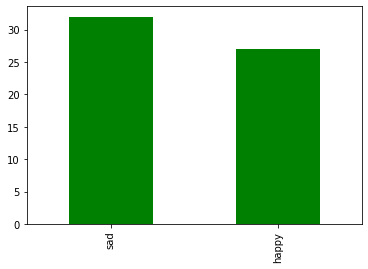

In [ ]:
popular_songs['emotion'].value_counts().plot(kind='bar', color="green")

The count of sad songs is still slightly higher for extremely popular songs. Does listening to sad music during our worst moments help us process these emotions? Or do we just like to feel sad? I hope it isn't the latter, that would be very concerning. 

### Frequency of Popular Songs based on the Key

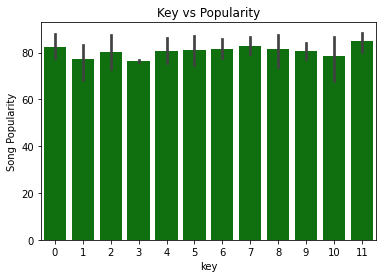

In [ ]:
sns.barplot(x = "key", y = "Song Popularity", data = billboard_df, color = "green")
plt.title('Key vs Popularity')
plt.show()

We can see that songs with a key value of 11 are extremely popular. This falls into pitch class B. 

### Frequency of popular songs based on time signature

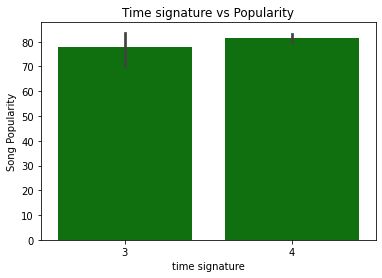

In [ ]:
sns.barplot(x = "time signature", y = "Song Popularity", data = billboard_df, color = "green")
plt.title('Time signature vs Popularity')
plt.show()

Songs with time signature 3 seem to be more popular. 3 beats per bar.

## Relationships between Audio Features and Popular Songs

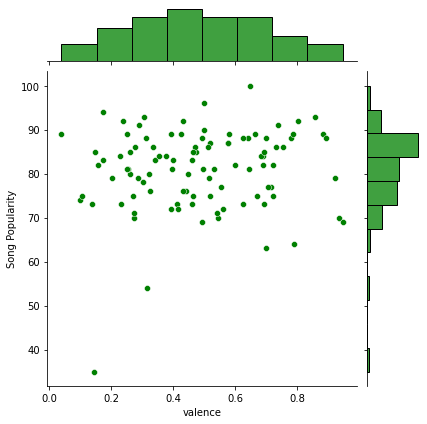

In [ ]:
sns.jointplot(x = 'valence', y = 'Song Popularity', data = billboard_df, color = "green")

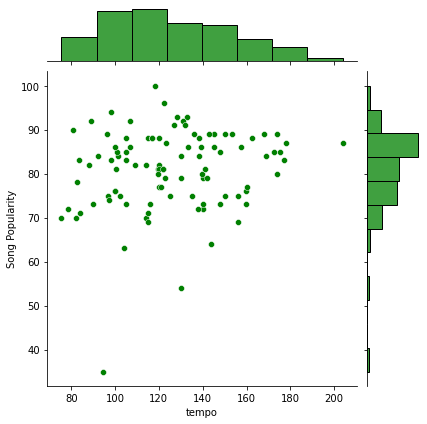

In [ ]:
sns.jointplot(x = 'tempo', y = 'Song Popularity', data = billboard_df, color = "green")

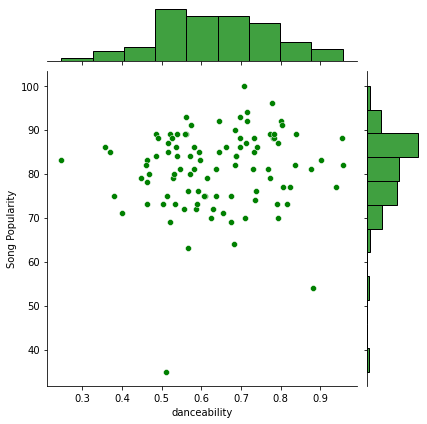

In [ ]:
sns.jointplot(x = 'danceability', y = 'Song Popularity', data = billboard_df, color = "green")

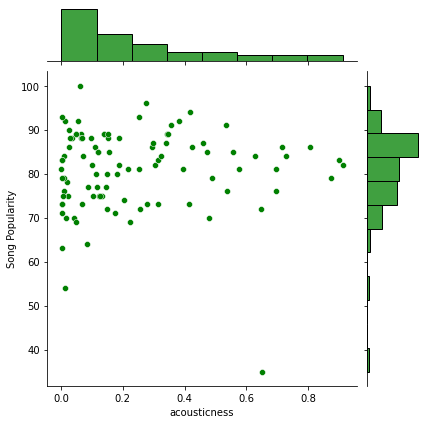

In [ ]:
sns.jointplot(x = 'acousticness', y = 'Song Popularity', data = billboard_df, color = "green")

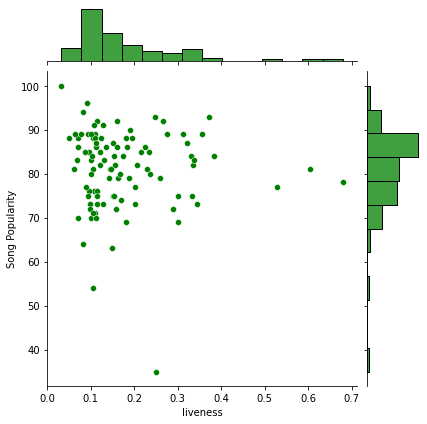

In [ ]:
sns.jointplot(x = 'liveness', y = 'Song Popularity', data = billboard_df, color = "green")

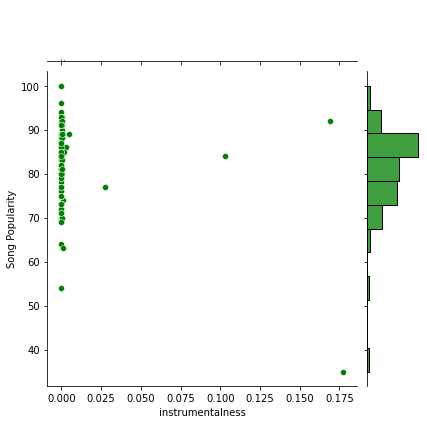

In [ ]:
sns.jointplot(x = 'instrumentalness', y = 'Song Popularity', data = billboard_df, color = "green")

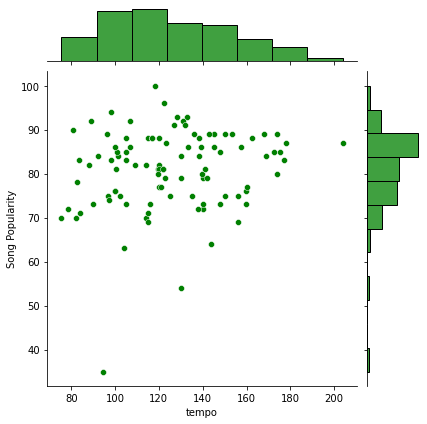

In [ ]:
sns.jointplot(x = 'tempo', y = 'Song Popularity', data = billboard_df, color = "green")

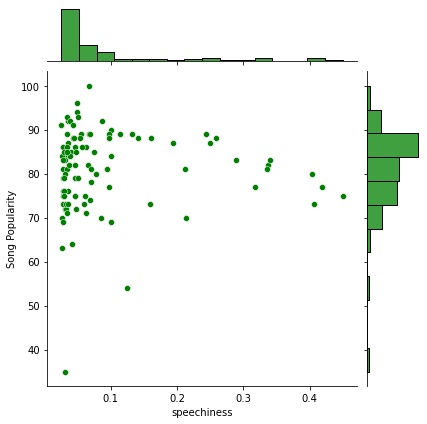

In [ ]:
sns.jointplot(x = 'speechiness', y = 'Song Popularity', data = billboard_df, color = "green")

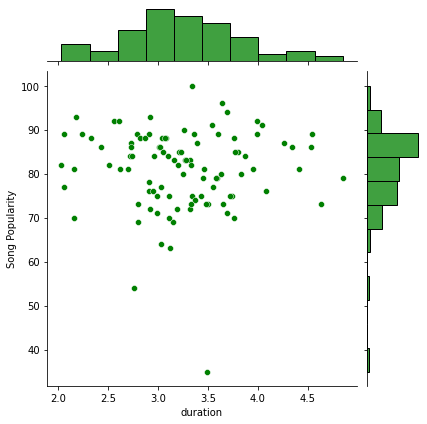

In [ ]:
sns.jointplot(x = 'duration', y = 'Song Popularity', data = billboard_df, color = "green")

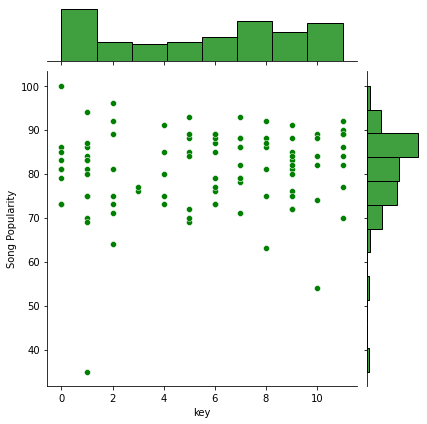

In [ ]:
sns.jointplot(x = 'key', y = 'Song Popularity', data = billboard_df, color = "green")

All the audio features seem to have medium-weak correlations with the popularity scores except for instrumentalness. We can't really see any relationship between instrumentalness and popularity. 
Perhaps this is related to the size of the dataset, data was scraped for only 100 songs from the Billboard Hot 100 list.

Maybe we would be able to see strong correlation results if the dataset was bigger? 

## Feature Engineering

The metric that I am considering for popular songs is a popularity score that is greater than 80. 
I will be converting scores into a binary format based on this metric. If popularity > 80, then 1, else 0. This is the target variable that I am interested in predicting. 

In the process of feature engineering, we have to convert variables into a format that is suitable for machine learning algorithms. 

### Target Variable Conversion

In [ ]:
 def popularity_convertor(row):
        if row["Song Popularity"] > 80:
            return 1
        else:
            return 0

billboard_df["Song Popularity"] = billboard_df.apply(popularity_convertor, axis=1)

### Dropping highly correlated columns

Energy and loudness are highly correlated with a score of 0.8.
Having two columns that are highly correlated means that there is a potential linear relationship between them. They will equally be able to predict the outcome, which means removing one would be a good idea.

We also don't need the emotion column for prediction, it was based entirely on the valence column. 

In [ ]:
billboard_df.drop(["emotion", "loudness"], axis=1, inplace = True)

### Dropping columns that are irrelevant for popularity prediction

We don't need Song ID because it doesn't have any impact on the popularity score of the song. We also don't need the name of the song for the purpose of prediction. 
Since most values in the instrumentalness column seem to be 0s, it doesn't really play a role in popularity score prediction. The joinplot also depicted a non existent correlation between instrumentalness and popularity.
For this dataset, I will be dropping the column. 

I will also be dropping the name of the artist. For the purpose of prediction, I am only interested in using audio features. 

In [ ]:
billboard_df.drop(["Song Title", "Song ID", "Artist"], axis=1, inplace = True)

### Turning categorical variables into dummies

Dummy variables are basically indicators of the presence or absence of a categorical variable. In this case, I am choosing the time signature column. This column has values that are either 3s or 4s. I want to split this into separate columns. 

In [ ]:
billboard_df["time signature"] = billboard_df["time signature"].astype("category")
billboard_df = pd.get_dummies(billboard_df, columns=["time signature"])

### Defining the feature dataset and the target variable

In [ ]:
y = billboard_df["Song Popularity"]
x = billboard_df.drop(["Song Popularity"], axis=1)

In [ ]:
y

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    1
97    1
98    0
99    0
Name: Song Popularity, Length: 100, dtype: int64

In [ ]:
x.head()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time signature_3,time signature_4
0,0.707,0.681,0,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455,0,1
1,0.644,0.728,8,1,0.0351,0.0543,0.169000,0.1610,0.430,88.993,153947,0,1
2,0.715,0.620,1,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520,0,1
3,0.696,0.809,5,1,0.0500,0.2520,0.000128,0.2480,0.857,132.962,131013,0,1
4,0.517,0.675,6,1,0.0357,0.4590,0.000000,0.1510,0.518,203.853,163855,0,1


### Normalization

Normalization can be used to transform the columns of the data frame to the same scale. I will be using Min-Max Scaling. This is a technique that's used to subtract the minimum value from each column's max value, it is then divided by the range. The new column will have a minimum value of 0 and a maximum value of 1. 

In [ ]:
# Normalization
import numpy as np


x_norm = (x - np.min(x))/(np.max(x)-np.min(x)).values
x_norm.head()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time signature_3,time signature_4
0,0.648801,0.632600,0.000000,1.0,0.097504,0.067716,0.000029,0.000000,0.669421,0.331142,0.464306,0.0,1.0
1,0.559944,0.693402,0.727273,1.0,0.022845,0.057930,0.954802,0.199134,0.431405,0.105166,0.188820,0.0,1.0
2,0.660085,0.553687,0.090909,0.0,0.054169,0.456773,0.000000,0.077304,0.147107,0.174947,0.589082,0.0,1.0
3,0.633286,0.798189,0.454545,1.0,0.057937,0.275330,0.000723,0.333643,0.901928,0.447713,0.052973,0.0,1.0
4,0.380818,0.624838,0.545455,1.0,0.024258,0.502958,0.000000,0.183673,0.528375,1.000000,0.247509,0.0,1.0


## Model Implementation

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_Test, y_train, y_test = train_test_split(x_norm, y, test_size = 0.2, random_state = 420)

The model that I have chosen for the prediction of popularity scores is the random forest classifier. Random forest combines the predictions of many decision trees to give the a good accuracy. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_Test)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_test, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.7
AUC: 0.6458333333333333


The accuracy using the random forest model is 70%, which is satisfactory. But I would like to use a bigger dataset with more songs next time to see how it affects the performance.

### Predicted Values

In [ ]:
predictions = RFC_Model.predict(X_Test)
predictions

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

1 represents a high popularity score of over 80 and 0 represents a low popularity score that falls below 80. 

In [ ]:
y_test

12    1
48    1
41    1
21    1
45    0
42    0
40    0
73    0
17    0
19    1
62    1
18    1
25    0
7     1
44    1
0     1
13    1
33    1
66    0
50    1
Name: Song Popularity, dtype: int64

These are the true values.